In [3]:
import pandas as pd
import numpy as np
import h5py 
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn import linear_model

In [4]:
df = pd.read_hdf("./data/Out_fin_pad(200)_x(-1.0,1.0)_E(0.01,10000.0)_eff(0.8)_100.h5")

In [5]:
df[["a"]].size

1582229

In [6]:
num_event = np.unique(df['Num']).size
num_event

299992

In [7]:
pos = df.query('Z == 1')
pos = pos.query('a == 8')

In [8]:
df

,a,inc,Z,Num,E0,Eg,Bp,fi_orb,tet_orb,fi,tet,x0,y0,z0,x_det,y_det,x_det_pad,y_det_pad
0,7.0,0.0,1.0,0.0,5.345,0.0000,0.2416,0.0,90.0,276.1860,48.5195,6.7717,-0.0007,-0.0001,-0.8157,0.3749,18.0,137.0
1,7.0,0.0,1.0,0.0,5.345,0.7823,0.2413,0.0,90.0,276.1860,48.5195,6.7770,-0.0067,-0.0007,-0.7755,0.4092,22.0,140.0
2,7.0,0.0,1.0,0.0,5.345,4.8142,0.2409,0.0,90.0,276.1860,48.5195,6.7823,-0.0127,-0.0014,-0.5312,0.3925,46.0,139.0
3,7.0,0.0,1.0,0.0,5.345,600.5468,0.2401,0.0,90.0,276.1860,48.5195,6.7862,-0.0171,-0.0019,-0.3575,0.2890,64.0,128.0
4,7.0,0.0,1.0,0.0,5.345,2.4765,0.2396,0.0,90.0,276.1860,48.5195,6.7902,-0.0216,-0.0023,0.0685,0.2812,106.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582224,5.0,0.0,1.0,299997.0,25.613,610.0252,0.1180,0.0,90.0,157.5433,51.5915,6.7896,0.0090,0.0217,-0.3553,0.4779,64.0,147.0
1582225,5.0,0.0,1.0,299997.0,25.613,2031.1881,0.1181,0.0,90.0,157.5433,51.5915,6.8002,0.0141,0.0340,-0.2175,0.6257,78.0,162.0
1582226,5.0,0.0,1.0,299997.0,25.613,26.6512,0.1182,0.0,90.0,157.5433,51.5915,6.8120,0.0198,0.0478,-0.0633,0.8679,93.0,186.0
1582227,2.0,0.0,1.0,299998.0,6.894,0.0000,0.2470,0.0,90.0,304.8320,25.0593,6.7719,-0.0003,-0.0002,0.0838,-0.5565,108.0,44.0


In [9]:
df.iloc[:, 0]
short_df = df[['Z', 'Num', 'Eg', 'x_det_pad', 'y_det_pad']]

In [10]:
short_df.query('Num == 0')

,Z,Num,Eg,x_det_pad,y_det_pad
0,1.0,0.0,0.0000,18.0,137.0
1,1.0,0.0,0.7823,22.0,140.0
2,1.0,0.0,4.8142,46.0,139.0
3,1.0,0.0,600.5468,64.0,128.0
4,1.0,0.0,2.4765,106.0,128.0
5,1.0,0.0,29.7412,140.0,125.0
6,1.0,0.0,667.9211,193.0,119.0


In [11]:
def plot_clear_one_element(df, num):
    fig, ax = plt.subplots()
    plt.xlim(0,200)
    plt.ylim(0,200)
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    df = df.drop(df[df.Eg == 0].index)
    ax.scatter(df[['x_det_pad']], df[['y_det_pad']])
    ax.scatter(particle[['x_det_pad']], particle[['y_det_pad']], facecolor='red')
    return fig, ax


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

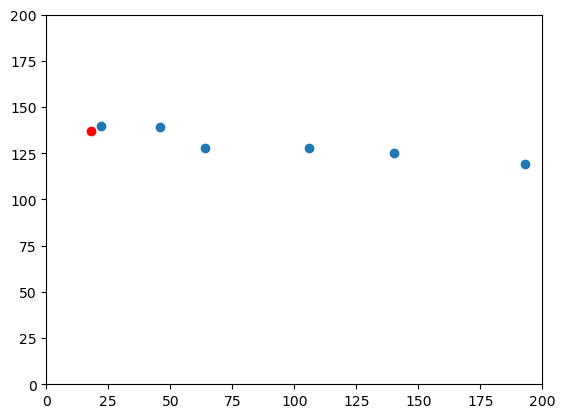

In [12]:
plot_clear_one_element(short_df, 0)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
     x_det_pad  y_det_pad
 0          41        195
 1          16         73
 2          18        123
 3         101        170
 4          57         65
 5          27        101
 6         129        154
 7          40         78
 8          96         37
 9          58         63
 10        164         25
 11         76        187
 12        114        185
 13         53         61)

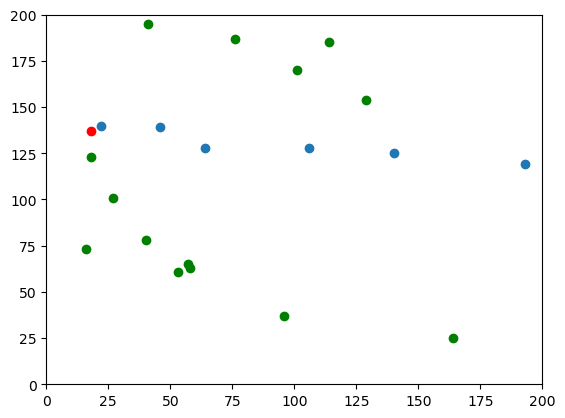

In [13]:
def generate_uniform(df, num, size):
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    x = particle.iloc[0]['x_det_pad']
    y = particle.iloc[0]['y_det_pad']
    size_df = df.iloc[:, 0].size
    xarr = uniform.rvs(scale = 199, size = size * size_df)
    yarr = uniform.rvs(scale = 199, size = size * size_df)
    return pd.DataFrame({'x_det_pad': xarr.astype(int), 'y_det_pad': yarr.astype(int)})
generate_uniform(short_df, 0, 2)

_PHOTON_NUM_SCALE = 2

def plot_with_uniform_one_elemnet(df, num):
    fig, ax = plot_clear_one_element(df, num)
    noise = generate_uniform(df, num, _PHOTON_NUM_SCALE)
    #print(noise)
    ax.scatter(noise[['x_det_pad']], noise[['y_det_pad']], facecolor= 'green')
    return fig, ax, noise

plot_with_uniform_one_elemnet(short_df, 0)

In [14]:
test0noize = generate_uniform(short_df, 0, 2)
test_df = short_df.query('Num == 0')
test0noize

,x_det_pad,y_det_pad
0,76,150
1,50,36
2,187,132
3,150,120
4,183,189
5,96,187
6,185,35
7,142,89
8,67,21
9,70,76


In [15]:
pd.concat([test_df, test0noize])

,Z,Num,Eg,x_det_pad,y_det_pad
0,1.0,0.0,0.0000,18.0,137.0
1,1.0,0.0,0.7823,22.0,140.0
2,1.0,0.0,4.8142,46.0,139.0
3,1.0,0.0,600.5468,64.0,128.0
4,1.0,0.0,2.4765,106.0,128.0
5,1.0,0.0,29.7412,140.0,125.0
6,1.0,0.0,667.9211,193.0,119.0
0,NaN,NaN,NaN,76.0,150.0
1,NaN,NaN,NaN,50.0,36.0
2,NaN,NaN,NaN,187.0,132.0


In [16]:
pd.concat([test_df, test0noize]).iloc[:, 0].size

21

In [17]:
def point_belongs_to_semiplane(x0,y0,x1,y1,px,py):
    #return np.dot([px-x0, py-y0],[x1-x0, y1-y0]) * np.dot([px,py], [x1-x0, y1-y0])
    return np.cross([x1-x0, y1-y0], [px-x0,py-y0]) >= 0
# / Length(x1-x0, y1-y0)

point_belongs_to_semiplane(0,0,1,1,5,7)

True

In [18]:
def plot_with_line(df, num, alpha, width):   
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    x0 = float(particle.iloc[0]['x_det_pad'])
    y0 = float(particle.iloc[0]['y_det_pad'])
       
    x1 = x0 + np.cos(alpha)
    y1 = y0 + np.sin(alpha)
    
    width_x = - width * np.sin(alpha)
    width_y = width * np.cos(alpha)
    
    fig, ax, noise =  plot_with_uniform_one_elemnet(df, num)
    
    df_and_noise = pd.concat([df, noise])
    
    size_df_and_noise = df_and_noise.iloc[:, 0].size
    
    #df_and_noise.where(point_belongs_to_semiplane(x1 + width_x, y1 + width_y,x2 + width_x, y2 + width_y, df_and_noise['x_det_pad'], df_and_noise['y_det_pad']))
    count = 0
    for i in range(0, size_df_and_noise):
        x = df_and_noise.iloc[i]['x_det_pad']
        y = df_and_noise.iloc[i]['y_det_pad']
        if (not point_belongs_to_semiplane(x0 + width_x, y0 + width_y,x1 + width_x, y1 + width_y, x, y) and
            point_belongs_to_semiplane(x0 - width_x, y0 - width_y,x1 - width_x, y1 - width_y, x, y) and
            not point_belongs_to_semiplane(x0 - width_x, y0 - width_y, x1 + width_x, y1 + width_y, x, y)
           ):
            count+=1
            ax.scatter(x,y, facecolor='yellow')
    
    print(count)  
    
    #plt.axline((x1, y1), (x2,y2), linestyle='-')
    plt.axline((x0 + width_x, y0 + width_y), (x1 + width_x, y1 + width_y), linestyle='--')
    plt.axline((x0 - width_x, y0 - width_y), (x1 - width_x, y1 - width_y), linestyle='--')
    plt.axline((x0 + width_x, y0 + width_y), (x1 - width_x, y1 - width_y), linestyle='--')

5


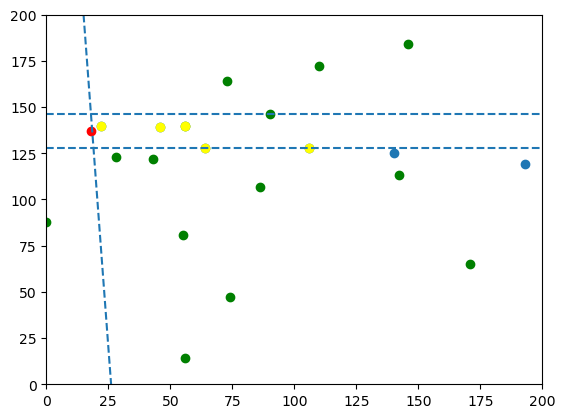

In [19]:
#plot_with_line(short_df, 0, -np.pi/2, 9.0)
plot_with_line(short_df, 0, 0, 9)

In [20]:
def find_count_for_line(df, num, alpha, width):   
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    x1 = particle.iloc[0]['x_det_pad']
    y1 = particle.iloc[0]['y_det_pad']
for i in range(0, 10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [21]:
def count_points_in_lines(df, x0, y0, alpha, width):         
    x1 = x0 + np.cos(alpha)
    y1 = y0 + np.sin(alpha)
    
    width_x = - width * np.sin(alpha)
    width_y = width * np.cos(alpha)
       
    size_df = df.iloc[:, 0].size
    
    count = 0
    for i in range(0, size_df):
        x = df.iloc[i]['x_det_pad']
        y = df.iloc[i]['y_det_pad']
        if (not point_belongs_to_semiplane(x0 + width_x, y0 + width_y,x1 + width_x, y1 + width_y, x, y) and
            point_belongs_to_semiplane(x0 - width_x, y0 - width_y,x1 - width_x, y1 - width_y, x, y) and
            not point_belongs_to_semiplane(x0 - width_x, y0 - width_y, x1 + width_x, y1 + width_y, x, y)
           ):
            count+=1
            #ax.scatter(x,y, facecolor='yellow')
    
    return count

In [22]:
def count_max_alpha(df, num, width):   
    df = df.query('Num == @num')
    particle = df.query('Eg == 0')
    x0 = float(particle.iloc[0]['x_det_pad'])
    y0 = float(particle.iloc[0]['y_det_pad'])
    
    noise = generate_uniform(df, num, 2)
    
    df_and_noise = pd.concat([df, noise])
    alpha_max=0
    cmax = 0
    for alpha in np.arange(0, 2*np.pi, 2*np.pi/72):
        
        c = count_points_in_lines(df_and_noise, x0, y0, alpha, width)
        if c>cmax:
            cmax=c
            alpha_max = alpha
    
    plot_with_line(short_df, num, alpha_max, width)
    return(alpha_max)

6


2.8797932657906435

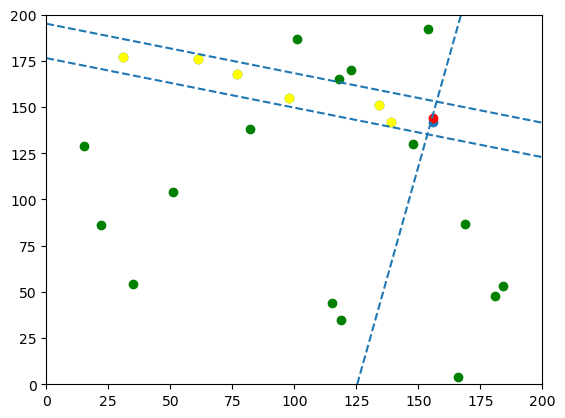

In [23]:
count_max_alpha(df, 1,9)